## Collection des données :

Scrapping depuis:
* https://www.planespotters.net 

* https://donnees.banquemondiale.org/indicateur/NY.GDP.PCAP.PP.CD?contextual=default

Fichier "csv" depuis:
* https://www.kaggle.com/traceyvanp/airlinefleet/data

In [506]:
import pandas as pd
from bs4 import BeautifulSoup

def scrapping_airlines(airline,ageCol):
    HtmlFile = open(airline+".html", 'r', encoding='utf-8')
    source_code = HtmlFile.read()
    from bs4 import BeautifulSoup
    soup = BeautifulSoup(source_code, 'html.parser')

    table = soup.findAll('tbody')[2]
    rows = table.find_all('tr')

    Airline=[]
    AircraftType = []
    Config = []
    Delivered = []
    Age = []
    rows
    for tr in rows:
        cols = tr.find_all('td')
        Airline.append(airline)
        AircraftType.append(cols[2].text.strip())
        Config.append(cols[3].text.strip())
        Delivered.append(cols[4].text.strip())
        Age.append(cols[ageCol].text.strip())
        



    airline = pd.DataFrame(data={'Airline':Airline,'AircraftType':AircraftType,'Config':Config,
                                 'Delivered':Delivered,'Age':Age       
                             })

    airline=airline[['Airline','AircraftType', 'Config','Delivered','Age']]
    for i in range(len(airline['Age'])):
        airline['Age'][i]=airline['Age'][i][0:4]
        if ' ' in airline['Age'][i]:
            airline['Age'][i]=airline['Age'][i][0:3]
        if airline['Age'][i]=='':
            airline['Age'][i]= 0
        airline['Age'][i]=float(airline['Age'][i])
    return airline

In [549]:
AirAlgerie=scrapping_airlines(r"Air Algérie",7)
AirMalta=scrapping_airlines(r"Air Malta",7)
EgyptAir=scrapping_airlines(r"EgyptAir",6)
EthiopianAir=scrapping_airlines(r"Ethiopian Airlines",7)
RAMaroc=scrapping_airlines(r"Royal Air Maroc",6)
Turkish=scrapping_airlines(r"Turkish Airlines",7)
Tunisair=scrapping_airlines(r"Tunisair",7)

In [282]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

def boxplotAirlines(airline):
    fig = plt.figure(figsize=(16,5))
    sns.set_style("whitegrid")
    ax = sns.boxplot(x=airline["Age"].astype(float)).set_title((airline.Airline[0]).upper()+' AIRCRAFTS AGE')
    print("L'âge moyen des flottes de "+(airline.Airline[0])+" :",airline["Age"].mean())
    

## Age des flottes:

Nous allons analyser l'âge moyen des flottes de certaines compagnies aériennes internationales et l'âge moyen des flottes des concurrents de Tunisair. Nous avons donc effectué des recherches. Les concurrents de Tunisair sur le marché africain et européen sont notamment:

* AirAlgerie
* AirMalta
* EgyptAir
* Ethiopian Airlines
* Royal Air Maroc
* Turkish Airlines

Nous allons tout d'abord calculer l'âge moyen des flottes des compagnies aériennes internationales.

L'âge moyen des flottes internationnales: 10.114999999999998


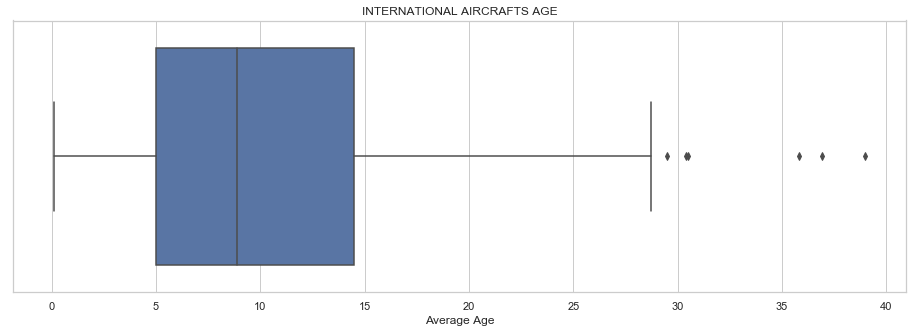

In [284]:
airlines = pd.read_csv('Fleet Data.csv')
fig = plt.figure(figsize=(16,5))
sns.set_style("whitegrid")
ax = sns.boxplot(x=airlines["Average Age"]).set_title('INTERNATIONAL AIRCRAFTS AGE')
print("L'âge moyen des flottes internationnales:",airlines["Average Age"].mean())

L'âge moyen des flottes de Air Algérie : 11.531999999999998


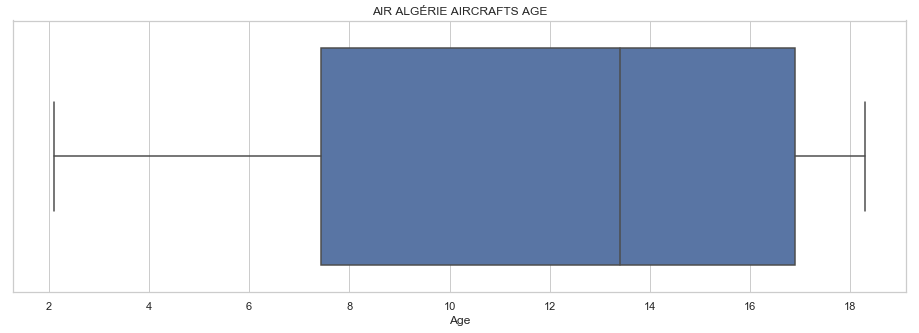

In [285]:
boxplotAirlines(AirAlgerie)

L'âge moyen des flottes de Air Malta : 11.47


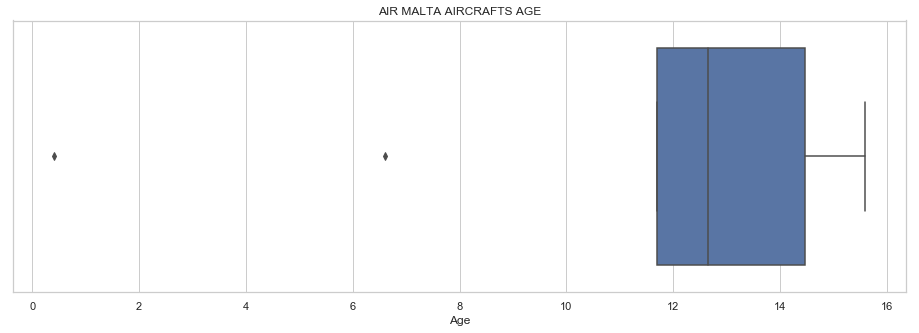

In [260]:
boxplotAirlines(AirMalta)

L'âge moyen des flottes de EgyptAir : 10.371999999999998


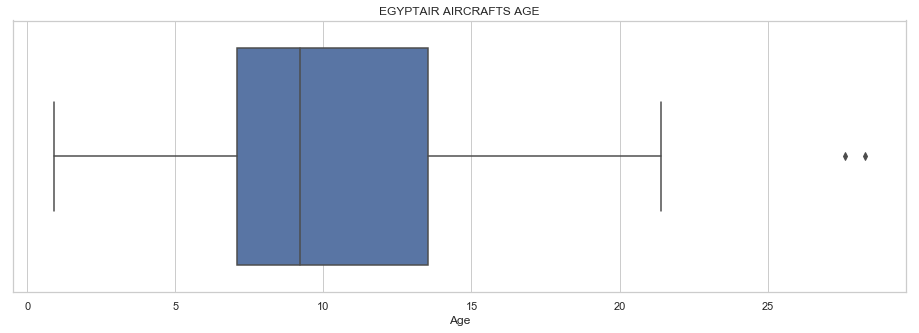

In [262]:
boxplotAirlines(EgyptAir)

L'âge moyen des flottes de Royal Air Maroc : 11.345098039215681


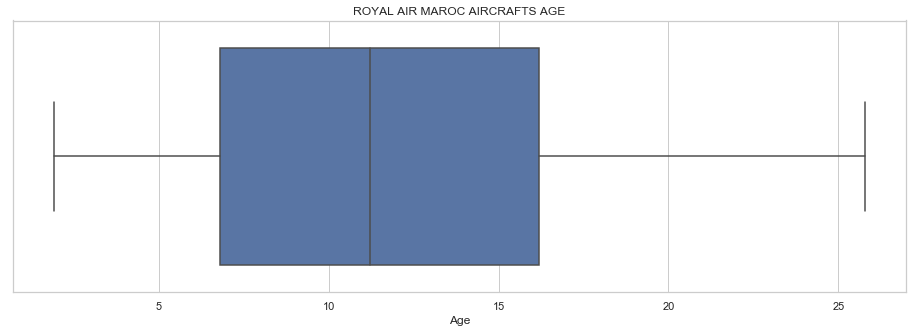

In [263]:
boxplotAirlines(RAMaroc)

L'âge moyen des flottes de Ethiopian Airlines : 8.04814814814815


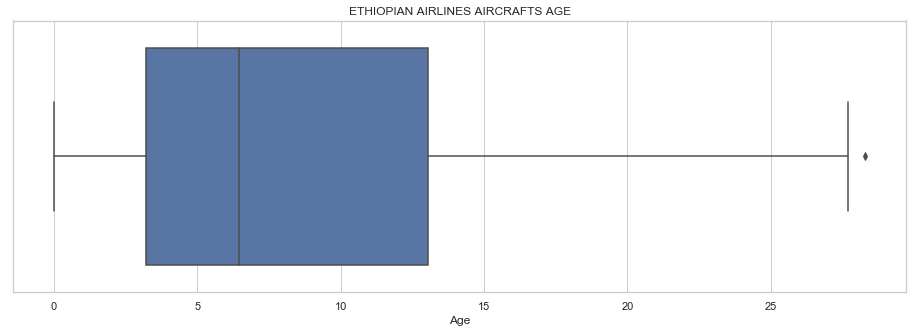

In [550]:
boxplotAirlines(EthiopianAir)

L'âge moyen des flottes de Turkish Airlines : 10.567999999999998


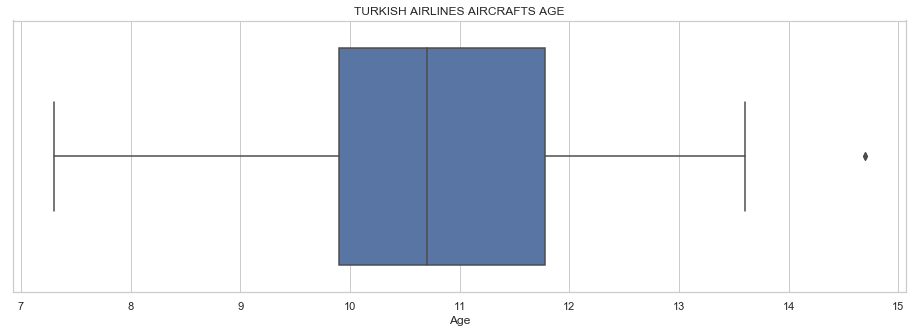

In [265]:
boxplotAirlines(Turkish)

##### Récapitulant :
* Internationnal: 10.11 ans
* AirAlgerie : 11.53 ans
* AirMalta : 11.47 ans
* EgyptAir :10.37 ans
* Ethiopian Airlines : 8.04 ans
* Royal Air Maroc :11.34 ans
* Turkish Airlines : 10.56 ans

L'âge moyen des flottes de Tunisair : 16.028571428571432


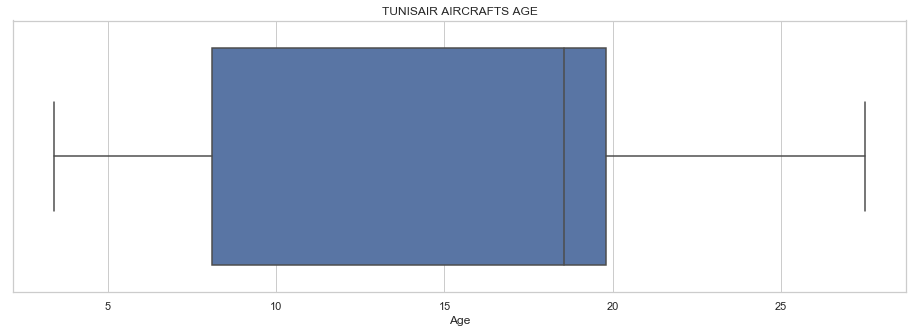

In [266]:
boxplotAirlines(Tunisair)

L'age moyen des flottes des concurrents de Tunisair est proche de l'age moyen des avions dans le monde.

Par contre les flottes de Tunisair ont un âge largement supérieur, ce qui peut être un obstacle pour cette compagnie à atteindre son objectif et à être parmi les meilleures compagnies aériennes en Afrique.

## Prix des flottes:

In [514]:
Air_Algerie=airlines.loc[airlines['Airline'] == "Air Algerie"]
Egypt_Air=airlines.loc[airlines['Airline'] == "EgyptAir"]
Ethiopian_Airlines=airlines.loc[airlines['Airline'] == "Ethiopian Airlines"]
RA_Maroc=airlines.loc[airlines['Airline'] == "Royal Air Maroc"]
Trans_avia=airlines.loc[airlines['Airline'] == "Transavia"]
Turkish_Airlines=airlines.loc[airlines['Airline'] == "Turkish Airlines"]
Tunis_Air=airlines.loc[airlines['Airline'] == "Tunisair"]


In [515]:
import warnings
def changeFormat(airline):
    warnings.filterwarnings('ignore')
    airline=airline.reset_index(drop=True)
    for i in range(len(airline)):
        airline["Total Cost (Current)"][i]=airline["Total Cost (Current)"][i].replace(",","")
        
    for i in range(len(airline)):
        airline["Total Cost (Current)"][i]=airline["Total Cost (Current)"][i][1:50]
        airline['Total Cost (Current)'][i]=float(airline['Total Cost (Current)'][i])
    return airline

In [516]:
Air_Algerie=changeFormat(Air_Algerie)
Egypt_Air=changeFormat(Egypt_Air)
Ethiopian_Airlines = changeFormat(Ethiopian_Airlines)
RA_Maroc=changeFormat(RA_Maroc)
Turkish_Airlines=changeFormat(Turkish_Airlines)
Tunis_Air=changeFormat(Tunis_Air)

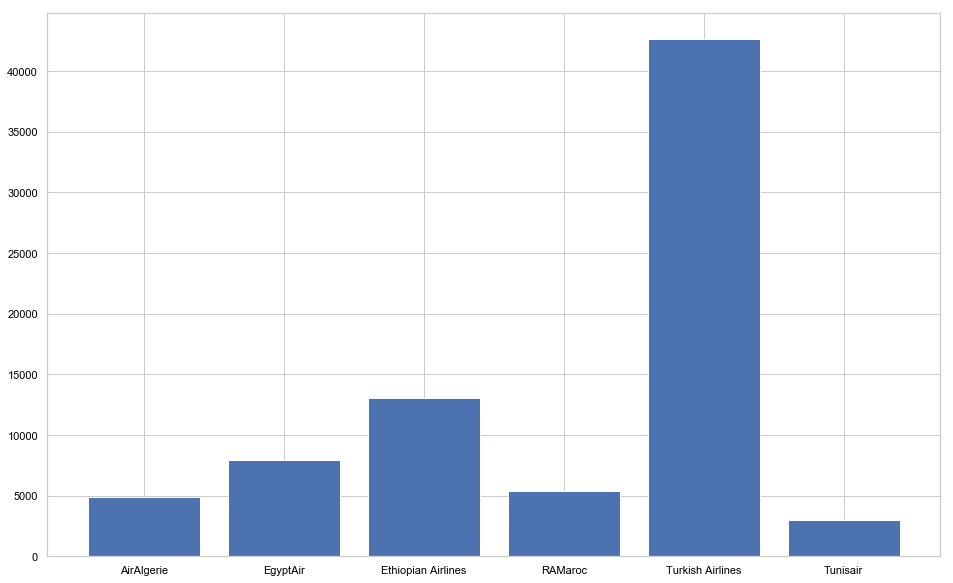

In [586]:
import numpy as np

bars=('AirAlgerie','EgyptAir','Ethiopian Airlines','RAMaroc','Turkish Airlines','Tunisair')
height = [Air_Algerie["Total Cost (Current)"].sum(),Egypt_Air["Total Cost (Current)"].sum(),
          Ethiopian_Airlines["Total Cost (Current)"].sum(),RA_Maroc["Total Cost (Current)"].sum(),
          Turkish_Airlines["Total Cost (Current)"].sum(),Tunis_Air["Total Cost (Current)"].sum()]
y_pos = np.arange(len(bars))

plt.figure(figsize=(16,10))
plt.bar(y_pos, height)
plt.xticks(y_pos, bars, color='black')
plt.yticks(color='black')
plt.show()

Le coût moyen de la flotte de Tunisair est le plus bas par rapport à Air Algérie, Royal Air Maroc, EgyptAir, Ethiopian Airlines et Turkish Airlines.

On remarque que la meilleure compagnie africaine en 2018, Ethiopian Airlines, a un coût moyen de flottes plus de 4 fois que celles de Tunisair, et Royal Air Maroc, la 6ème meilleure compagnie africaine en 2018, a un coût moyen de flottes lègerement superieur à celui de Tunisair.

C'est tout à fait logique, vu l'age des flottes.

## La notoriété des compagnies par rapport au PIB de chaque pays:

Nous allons maintenant etudier le rapport entre le niveau d'activité économique du pays et la notoriété des compagnies africaines.

D'après Skytrax, Ethiopian Airlines est la première compagnie africaine,en termes de service à bord, la ponctualité et la sécurité, trois critères qui pèsent dans l'évaluation des passagers.


**_Réference:_** http://afrique.le360.ma/maroc-autres-pays/economie/2018/07/24/22074-afrique-les-dix-meilleures-compagnies-aeriennes-africaines-en-2018-22074

__PIB par habitant (Parité pouvoir d'achat)__ :Cet indicateur, bien que complexe, est l'un des plus adéquats pour comparer des économies entre elles.

On s'intéressera au PIB des 5 pays africains de notre étude, à savoir: l'Algérie, L'Ethiopie, l'Egypte, le Maroc et bien-sûr la Tunisie.

In [545]:
PIB = pd.read_csv('PIB_data.csv',encoding = "utf-8")

In [581]:
Tunisie=PIB.loc[PIB['Country Code']=='TUN']
Ethiopie=PIB.loc[PIB['Country Code']=='ETH']
Algerie=PIB.loc[PIB['Country Code']=='DZA']
Egypte=PIB.loc[PIB['Country Code']=='EGY']
Maroc=PIB.loc[PIB['Country Code']=='MAR']



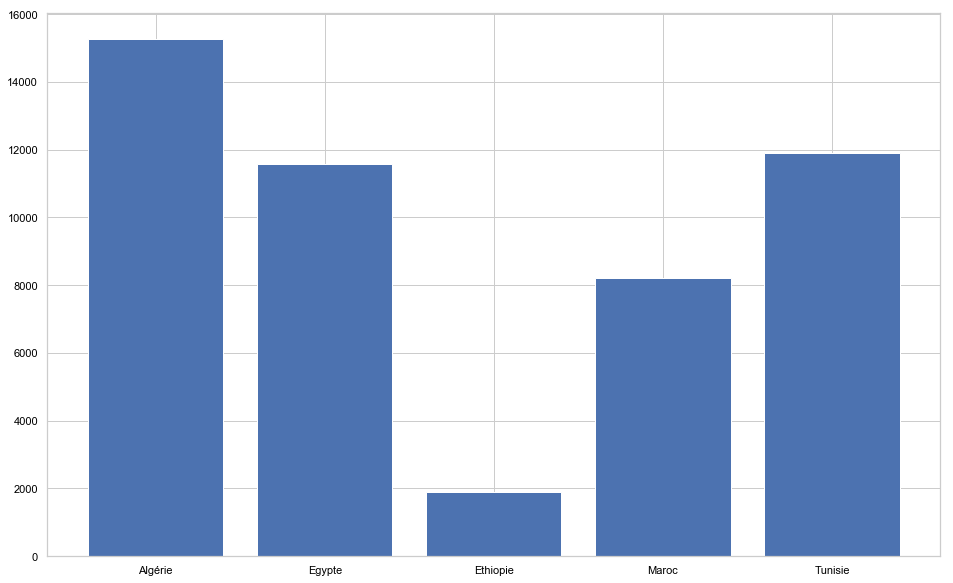

In [607]:
bars=('Algérie','Egypte','Ethiopie','Maroc','Tunisie')
height = [Algerie['2017 [YR2017]'][4],Egypte['2017 [YR2017]'][3],Ethiopie['2017 [YR2017]'][1],
          Maroc['2017 [YR2017]'][2],Tunisie['2017 [YR2017]'][0]]
y_pos = np.arange(len(bars))

plt.figure(figsize=(16,10))
plt.bar(y_pos, height)
plt.xticks(y_pos, bars, color='black')
plt.yticks(color='black')
plt.show()

Nous constatons que malgré le __PIB(PPA)__ très faible de l'Éthiopie, et celui du Maroc, ça ne les a pas empêché d'avoir des compagnies aériennes plus développé que de la Tunisie. Ce qui veut dire que quoique la santé économique des compagnies dépendît de celui du pays, ces compagnies ont su trouver les ressources pour se développer.